In [11]:
import json
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import stats
from pprint import pprint
from config import api_key

In [12]:
#pulled data from csv
injury_df = pd.read_csv("output_data/injury_data.csv")
injury_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
0,0,6048,2012,1,1,Early Doucet,ARI,WR,--,False
1,1,6353,2012,1,1,Adam Snyder,ARI,G,Elbow,False
2,2,9319,2012,1,1,LaRod Stephens-Howling,ARI,RB,Groin,False
3,3,9323,2012,1,1,Chris Wells,ARI,RB,Hamstring,False
4,4,9782,2012,1,1,Gregory Toler,ARI,CB,Hip,False
...,...,...,...,...,...,...,...,...,...,...
55613,55613,21755,2020,1,7,Isaiah Wright,WAS,WR,Shoulder,True
55614,55614,21875,2020,1,7,James Smith-Williams,WAS,DE,Concussion,True
55615,55615,21955,2020,1,7,Thaddeus Moss,WAS,TE,Undisclosed,True
55616,55616,22008,2020,1,7,Saahdiq Charles,WAS,OL,Knee,True


In [13]:
#create dataframe for injury count
injury_df['Body Part'].value_counts()

Knee             10828
Ankle             5801
Hamstring         4226
Shoulder          3851
Foot              2619
                 ...  
Knee, thumb          1
Ankle, hand          1
Hand, calf           1
Foot, neck           1
Hand, illness        1
Name: Body Part, Length: 503, dtype: int64

In [14]:
#rename concussion data parts to the same for ease.
concussion_df = injury_df.loc[(injury_df['Body Part'] == 'Concussion') & (injury_df['Body Part'] == 'Concussion, ankle')\
                              & (injury_df['Body Part'] == 'Concussion, eye') & (injury_df['Body Part'] == 'Concussion, hip')\
                              & (injury_df['Body Part'] == 'Concussion, illness') & (injury_df['Body Part'] == 'Concussion, stinger')\
                              & (injury_df['Body Part'] == 'Concussion, elbow') & (injury_df['Body Part'] == 'Concussion, knee, ankle')\
                              & (injury_df['Body Part'] == 'Concussion, hamstring') & (injury_df['Body Part'] == 'Concussion, finger')\
                              & (injury_df['Body Part'] == 'Concussion, chest') & (injury_df['Body Part'] == 'Concussion, left shoulder')\
                              & (injury_df['Body Part'] == 'Concussion, toe') & (injury_df['Body Part'] == 'Concussion, foot, thigh')\
                              & (injury_df['Body Part'] == 'Concussion, shoulder') & (injury_df['Body Part'] == 'Concussion, groin')\
                              & (injury_df['Body Part'] == 'Concussion, not injury related') & (injury_df['Body Part'] == 'Concussion, neck')\
                              & (injury_df['Body Part'] == 'Concussion, shoulder') & (injury_df['Body Part'] == 'Head')]
concussion_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive


In [15]:
concussion_df = injury_df.loc[(injury_df['Body Part'] == 'Concussion')]
concussion_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
75,75,8853,2012,1,1,Gerald Sensabaugh,DAL,DB,Concussion,False
89,89,14201,2012,1,1,Bill Bentley,DET,DB,Concussion,False
100,100,14608,2012,1,1,Terrell Manning,GB,LB,Concussion,False
164,164,12762,2012,1,1,Daniel Thomas,MIA,RB,Concussion,False
224,224,6304,2012,1,1,Darrelle Revis,NYJ,DB,Concussion,False
...,...,...,...,...,...,...,...,...,...,...
55416,55416,20971,2020,1,7,Andrew Van Ginkel,MIA,OLB,Concussion,False
55438,55438,16851,2020,1,7,Carl Davis Jr.,NE,DT,Concussion,True
55456,55456,17457,2020,1,7,Nick Easton,NO,OL,Concussion,True
55473,55473,19200,2020,1,7,C.J. Board,NYG,WR,Concussion,True


In [16]:
injury_df['Body Part'] = injury_df['Body Part'].replace(
    {'Concussion, ankle': 'Concussion', 'Concussion, eye': 'Concussion', 'Concussion, hip': 'Concussion', 'Concussion, illness': 'Concussion',\
    'Concussion, stinger': 'Concussion', 'Concussion, elbow': 'Concussion', 'Concussion, knee, ankle': 'Concussion','Concussion, hamstring': 'Concussion',\
    'Concussion, finger': 'Concussion', 'Concussion, chest': 'Concussion', 'Concussion, left shoulder': 'Concussion',\
    'Concussion, toe': 'Concussion', 'Concussion, foot, thigh': 'Concussion', 'Concussion, shoulder': 'Concussion',\
    'Concussion, groin': 'Concussion','Concussion, not injury related': 'Concussion', 'Concussion, neck': 'Concussion',\
    'Concusison': 'Concussion', 'Head': 'Concussion'})

In [17]:
concussion_df = injury_df.loc[(injury_df['Body Part'] == 'Concussion')]
concussion_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
15,15,8638,2012,1,1,Sean Considine,BAL,S,Concussion,False
33,33,12607,2012,1,1,Lorenzo Booker,CHI,RB,Concussion,False
44,44,9956,2012,1,1,Dan Skuta,CIN,LB,Concussion,False
75,75,8853,2012,1,1,Gerald Sensabaugh,DAL,DB,Concussion,False
89,89,14201,2012,1,1,Bill Bentley,DET,DB,Concussion,False
...,...,...,...,...,...,...,...,...,...,...
55416,55416,20971,2020,1,7,Andrew Van Ginkel,MIA,OLB,Concussion,False
55438,55438,16851,2020,1,7,Carl Davis Jr.,NE,DT,Concussion,True
55456,55456,17457,2020,1,7,Nick Easton,NO,OL,Concussion,True
55473,55473,19200,2020,1,7,C.J. Board,NYG,WR,Concussion,True


In [18]:
concussion_df['Body Part'].count()

2992

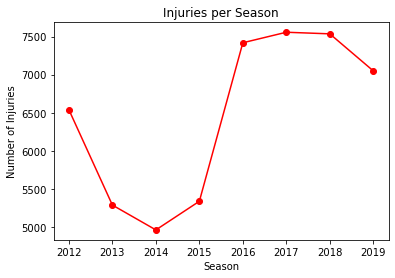

In [19]:
#create first graph total injuries per season
group_seasons_df = injury_df.groupby("Season").count()
group_seasons_df = group_seasons_df[["Body Part"]]
group_seasons_df = group_seasons_df.reset_index()
group_seasons_df = group_seasons_df[group_seasons_df['Season'] != 2020]
season = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
bodypart = group_seasons_df['Body Part']

injury_count_graph = plt.plot(season, bodypart, marker='o', color='r')
plt.title("Injuries per Season")
plt.xlabel('Season')
plt.ylabel('Number of Injuries')

plt.savefig("season_injury_graph.png")
plt.show()

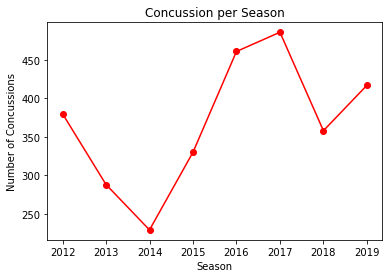

In [20]:
#create second graph for concussion countr per seasonm
season_concussion = concussion_df.groupby('Season').count()
season_concussion = season_concussion[['Body Part']]
season_concussion = season_concussion.reset_index()
season_concussion = season_concussion[season_concussion['Season'] != 2020]
season_concussion.rename(columns={'Body Part': 'Concussion Count'})
season = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
bodypart = season_concussion['Body Part']


# Create Bar graph
concussion_graph = plt.plot(season, bodypart, marker='o', color='r')
plt.title('Concussion per Season')
plt.xlabel('Season')
plt.ylabel('Number of Concussions')

plt.savefig("season_concussion_graph.png")
plt.show()

In [21]:
season_concussion.rename(columns={'Body Part': 'Concussion Count'})

,Season,Concussion Count
0,2012,380
1,2013,288
2,2014,229
3,2015,330
4,2016,461
5,2017,486
6,2018,358
7,2019,417


In [22]:
group_seasons_df = group_seasons_df.reset_index()
group_seasons_df = group_seasons_df[group_seasons_df["Season"] != 2020]
group_seasons_df

bins = [2011, 2017, 2020]
bin_groups = ["2012-2017", "2018-2019"]

group_seasons_df["Injuries Before/After Rule Change"] = pd.cut(group_seasons_df['Season'], bins, labels=bin_groups)
rule_change_df = group_seasons_df.groupby('Injuries Before/After Rule Change')
rule_change_df.mean()

,index,Season,Body Part
Injuries Before/After Rule Change,,,
2012-2017,2.5,2014.5,6182.833333
2018-2019,6.5,2018.5,7292.000000


In [23]:
season_concussion = season_concussion.reset_index()
season_concussion = season_concussion[season_concussion["Season"] != 2020]
season_concussion

bins = [2011, 2017, 2020]
bin_groups = ["2012-2017", "2018-2019"]

season_concussion["Concussions Before Rule Change"] = pd.cut(season_concussion['Season'], bins, labels=bin_groups)
rule_change_concussion = season_concussion.groupby('Concussions Before Rule Change')
rule_change_concussion.mean()

,index,Season,Body Part
Concussions Before Rule Change,,,
2012-2017,2.5,2014.5,362.333333
2018-2019,6.5,2018.5,387.500000


In [24]:
after_movie_df = season_concussion[["Body Part"]].iloc[[6,7]]
after_movie_df

,Body Part
6,358
7,417


In [25]:
before_movie_df = season_concussion[["Body Part"]].iloc[[0,1,2,3,4,5]]
before_movie_df

,Body Part
0,380
1,288
2,229
3,330
4,461
5,486


In [26]:
after_movie_df2 = group_seasons_df[["Body Part"]].iloc[[6,7]]
after_movie_df2

,Body Part
6,7535
7,7049


In [27]:
before_movie_df2 = group_seasons_df[["Body Part"]].iloc[[0,1,2,3,4,5]]
before_movie_df2

,Body Part
0,6538
1,5287
2,4961
3,5337
4,7418
5,7556


In [28]:
stats.ttest_1samp(before_movie_df, after_movie_df.mean())

Ttest_1sampResult(statistic=Body Part   -0.618379
dtype: float64, pvalue=array([0.56340387]))

In [29]:
stats.ttest_1samp(before_movie_df2, after_movie_df2.mean())

Ttest_1sampResult(statistic=Body Part   -2.374087
dtype: float64, pvalue=array([0.06362946]))